In [1]:
import pandas as pd
import requests
import tweepy
import json
import os
import matplotlib
import matplotlib.pyplot as plt

# 1.Gathering Data:

## a) Twitter Enhance Archive:

In [2]:
df1=pd.read_csv(r'C:\Users\toptech\Downloads\twitter-archive-enhanced.csv')

In [3]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## b) Image Predictions File:

In [5]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

open('image_prediction.tsv', 'wb').write(response.content)

335079

In [6]:
df2=pd.read_csv('image_prediction.tsv',sep='\t')

In [7]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


## c) Additional Data via Twitter API:

In [9]:
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)
response

<Response [200]>

In [10]:
tweet_json_file = 'tweet-json.txt'

In [11]:
tweet_json_data = []

with open(tweet_json_file, 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

# convert the tweet JSON data dictionary list to a DataFrame
df3 = pd.DataFrame(tweet_json_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

df3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [12]:
tweet_ids = df1.tweet_id.values

In [13]:
count = 0
for tweet_id in df3['tweet_id']:
    if tweet_id in tweet_ids:
        count+=1
print (count)

2354


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.2 KB


# 2. Assessing data:

In [15]:
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
df1.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
           ... 
Fabio         1
Sully         1
Fido          1
Humphrey      1
Carll         1
Name: name, Length: 957, dtype: int64

In [17]:
df1.name.value_counts().head(60)

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Penny       10
Tucker      10
Lola        10
Bo           9
Winston      9
the          8
Sadie        8
Daisy        7
Toby         7
Buddy        7
an           7
Bailey       7
Scout        6
Oscar        6
Rusty        6
Leo          6
Bella        6
Koda         6
Milo         6
Jack         6
Jax          6
Dave         6
Stanley      6
Sammy        5
Finn         5
Gus          5
Phil         5
George       5
Oakley       5
Chester      5
very         5
Bentley      5
Louis        5
Alfie        5
Sunny        5
Larry        5
Beau         4
Hank         4
Scooter      4
Shadow       4
Sampson      4
Gerald       4
Luna         4
Duke         4
Bear         4
Derek        4
Winnie       4
one          4
Clark        4
Cassie       4
Brody        4
Bruce        4
Riley        4
Walter       4
Name: name, dtype: int64

In [18]:
df1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [19]:
df1[df1.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [20]:
sum (df1.expanded_urls.isnull())

59

In [21]:
df1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
247,845459076796616705,NaN,NaN,2017-03-25 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a heartwarming scene of ...,7.562885e+17,4.196984e+09,2016-07-22 00:43:32 +0000,https://twitter.com/dog_rates/status/756288534...,12,10,None,None,None,None,None
2194,668892474547511297,NaN,NaN,2015-11-23 20:42:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruffles. He is an Albanian Shoop Da Wh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668892474...,11,10,Ruffles,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
1191,717841801130979328,NaN,NaN,2016-04-06 22:29:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Barclay. His father was a banana. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717841801...,11,10,Barclay,None,None,None,None
1306,707377100785885184,NaN,NaN,2016-03-09 01:26:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog just brutally murdered a snowman. Cur...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707377100...,9,10,None,None,None,None,None


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.2 KB


In [23]:
df3.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [24]:
df3.retweet_count.describe()

count     2354.000000
mean      3164.797366
std       5284.770364
min          0.000000
25%        624.500000
50%       1473.500000
75%       3652.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [25]:
df1.tweet_id.describe()

count    2.356000e+03
mean     7.427716e+17
std      6.856705e+16
min      6.660209e+17
25%      6.783989e+17
50%      7.196279e+17
75%      7.993373e+17
max      8.924206e+17
Name: tweet_id, dtype: float64

In [26]:
all_columns=pd.Series(list(df1)+list(df2)+list(df3))

In [27]:
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

## Assessment Report:
df1= Enhanced twitter Archive
df2= image predictions file
df3= additional twitter data
### A)Tidiness issues:
1. df1 one variable in four columns(puppo, floofer,puppo and doggo.
2. All the three dataframes should be collected in one dataframe.
### B) Quality issues:
3. There is some retweets and tweets without pictures and duplicate rows. 
4. There is some useless columns like retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp. 
5. df1: wrong values for denominator other than 10
6. df1: very high inappropriate values in the rating_denominator column
7. df2: non-descriptive column names. ex:p1,
8. df1: timestamp is in string format,twitter_id integar not string
9. df1: wrong names for example: a, an, the??
10. df1: Some dog names doesnot start by a capital letter.

# 3. Cleaning data:

In [28]:
# first, we should make a copy of the three dataframes:
df1_clean=df1.copy()
df2_clean=df2.copy()
df3_clean=df3.copy()

## Solve tidiness issue first:
#### Problem 1: df1 one variable in four columns(puppo, floofer,puppo and doggo).
##### Define:
Melt the four columns in one new column called 'dog_stage'
first, we need to create the new column to compile all the data in the four columns
then, delete the old four columns by the drop method.

##### Code:

In [29]:
df1_clean.loc[df1_clean['doggo'] == 'doggo', 'dog_stage'] = 'doggo'
df1_clean.loc[df1_clean['floofer'] == 'floofer', 'dog_stage'] = 'floofer'
df1_clean.loc[df1_clean['pupper'] == 'pupper', 'dog_stage'] = 'pupper'
df1_clean.loc[df1_clean['puppo'] == 'puppo', 'dog_stage'] = 'puppo'

In [30]:
df1_clean = df1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#### test:

In [31]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   380 n

In [32]:
df1_clean.dog_stage.value_counts()

pupper     257
doggo       83
puppo       30
floofer     10
Name: dog_stage, dtype: int64

#### Problem 2: Compile the three dataframes into one large one:
##### Define:
merge the first two data frames then add the last one to df_clean.
##### Code:

In [33]:
df1_clean = pd.merge(left=df1_clean,
                                 right=df3_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [34]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2354 non-null   object 
 4   source                      2354 non-null   object 
 5   text                        2354 non-null   object 
 6   retweeted_status_id         179 non-null    float64
 7   retweeted_status_user_id    179 non-null    float64
 8   retweeted_status_timestamp  179 non-null    object 
 9   expanded_urls               2295 non-null   object 
 10  rating_numerator            2354 non-null   int64  
 11  rating_denominator          2354 non-null   int64  
 12  name                        2354 non-null   object 
 13  dog_stage                   379 n

In [35]:
df1_clean = df1_clean.merge(df2_clean, on='tweet_id', how='inner')

##### Test:

In [36]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  dog_stage                   320 n

In [37]:
df1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### problem 3:
There is retweets and tweets without pictures are included.
##### Define:
Delete all retweets and tweets without pictures.
##### Code:

In [38]:
# Delete the retweets
df1_clean = df1_clean[pd.isnull(df1_clean.retweeted_status_id)]

# Delete duplicated tweet_id
df1_clean = df1_clean.drop_duplicates()

# Delete tweets with no pictures
df1_clean = df1_clean.dropna(subset = ['jpg_url'])

##### Test:

In [39]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  dog_stage                   306 n

#### problem 4:
useless coulmns in the first dataframe.
##### Define:
Delete the useless columns in the first dataframe like 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id' and 'in_reply_to_user_id'.
##### Code:

In [40]:
# Delete columns we don't need anymore
df1_clean = df1_clean.drop('retweeted_status_id', 1)
df1_clean = df1_clean.drop('retweeted_status_user_id', 1)
df1_clean = df1_clean.drop('retweeted_status_timestamp', 1)
df1_clean = df1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], 1)

##### Test:

In [41]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   dog_stage           306 non-null    object 
 9   retweet_count       1994 non-null   int64  
 10  favorite_count      1994 non-null   int64  
 11  jpg_url             1994 non-null   object 
 12  img_num             1994 non-null   int64  
 13  p1                  1994 non-null   object 
 14  p1_conf             1994 non-null   float64
 15  p1_dog              1994 non-null   bool   
 16  p2    

#### problem 5:
Some denominator values are not equal 10.
##### Define:
assign the value '10' to all cells in the rating_denominator column.
##### Code:

In [42]:
df1_clean = df1_clean[df1_clean.rating_denominator == 10]

##### Test:

In [43]:
df1_clean.rating_denominator.value_counts()

10    1976
Name: rating_denominator, dtype: int64

#### problem 6:
Some numerator values are very high.
##### Define:
Exclude all numerator values that are more than 20.
##### Code:

In [44]:
df1_clean = df1_clean[df1_clean['rating_numerator'] <= 20 ]

##### Test:

In [45]:
len(df1_clean[df1_clean['rating_numerator'] > 20 ])

0

In [46]:
df1_clean.rating_numerator.value_counts()

12    450
10    419
11    396
13    261
9     150
8      95
7      51
14     35
5      33
6      32
3      19
4      15
2       9
1       4
0       2
Name: rating_numerator, dtype: int64

#### problem 7:
undescriptive column names in the image prediction dataframe.
##### Define:
Rename the columns into more descriptive names.
##### Code:

In [47]:
df1_clean= df1_clean.rename(columns={'p1':'Breed_probability1', 'p2':'Breed_probability2', 'p3':'Breed_probability3'})

##### Test:

In [48]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   dog_stage           305 non-null    object 
 9   retweet_count       1971 non-null   int64  
 10  favorite_count      1971 non-null   int64  
 11  jpg_url             1971 non-null   object 
 12  img_num             1971 non-null   int64  
 13  Breed_probability1  1971 non-null   object 
 14  p1_conf             1971 non-null   float64
 15  p1_dog              1971 non-null   bool   
 16  Breed_

#### problem 8:
wrong data types are assigned to some columns.
##### Define:
fix data types in the dataframe.
##### Code:

In [49]:
df1_clean['tweet_id'] = df1_clean['tweet_id'].astype(str)
df1_clean['timestamp'] = pd.to_datetime(df1_clean.timestamp)
df1_clean['dog_stage'] = df1_clean['dog_stage'].astype('category')

##### Test:

In [50]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_stage           305 non-null    category           
 9   retweet_count       1971 non-null   int64              
 10  favorite_count      1971 non-null   int64              
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

#### problem 9:
Some dog names are inappropriately extracted.
##### Define:
fix wrong dog names.
##### Code:

In [51]:
wrong_name_list = ['a','the','an']
for i in wrong_name_list:
        df1_clean['name'].replace(i, 'None', inplace=True)

##### Test:

In [52]:
df1_clean['name'].value_counts()

None       598
Charlie     11
Oliver      10
Lucy        10
Cooper      10
          ... 
Poppy        1
Blitz        1
Bradley      1
Tessa        1
Carll        1
Name: name, Length: 929, dtype: int64

#### problem 10:
Some dog names are not starting by a capital letter.
##### Define:
Capitalize the lower case dog names.
##### Code:

In [53]:
df1_clean['name'].str.islower().sum()

29

In [54]:
df1_clean['name'] = df1_clean.name.str.capitalize()

##### Test:

In [55]:
df1_clean['name'].str.islower().sum()

0

# Data Storage:
### Now, df1_clean is ready to be stored as archive-clean-master.csv

In [56]:
df1_clean.to_csv('twitter_archive_master.csv', index = False)

In [57]:
ls *.csv

 Volume in drive C has no label.
 Volume Serial Number is 7CCE-80FA

 Directory of C:\Users\toptech

08/18/2020  12:12 PM         1,008,068 twitter_archive_master.csv
               1 File(s)      1,008,068 bytes
               0 Dir(s)  13,277,519,872 bytes free


# Data visualization:
#### I want to find which life stage of dogs are involved with the highest percentage of tweets. Need to represent this in the form of a pie chart.

(-1.2883569010288933,
 1.2316922862844304,
 -1.2392556997539788,
 1.211037654696614)

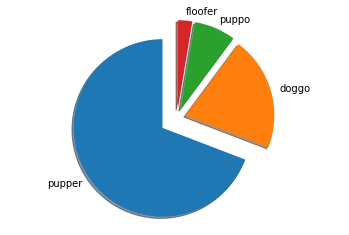

In [58]:
dog_stage_count = list(df1_clean[df1_clean['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = df1_clean[df1_clean['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
axis1.axis('equal')

# Data insights:
### 1. Get insights about the dog ratings classified according to the dog's lifestage.

In [63]:
df1_clean.groupby(['dog_stage'])['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,63.0,11.888889,1.471351,8.0,11.0,12.0,13.0,14.0
floofer,8.0,11.875000,1.125992,10.0,11.0,12.0,13.0,13.0
pupper,211.0,10.649289,1.759393,3.0,10.0,11.0,12.0,14.0
puppo,23.0,12.043478,1.296087,9.0,11.5,12.0,13.0,14.0


### 2. What is the most favourited tweet to date? 

In [71]:
df1_clean.sort_values(by = 'favorite_count', ascending = False).head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,Breed_probability1,p1_conf,p1_dog,Breed_probability2,p2_conf,p2_dog,Breed_probability3,p3_conf,p3_dog
329,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,48265,...,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
851,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,79515,...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
59,879415818425184262,2017-06-26 19:07:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,NaN,45849,...,1,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True


In [75]:
df1_clean.favorite_count.value_counts().sort_index(ascending = False)

132810    1
131075    1
107956    1
107015    1
106827    1
         ..
113       1
111       1
108       1
107       1
81        1
Name: favorite_count, Length: 1830, dtype: int64

### 3. What is the most retweeted tweet to date? 

In [72]:
df1_clean.sort_values(by = 'retweet_count', ascending = False).head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,Breed_probability1,p1_conf,p1_dog,Breed_probability2,p2_conf,p2_dog,Breed_probability3,p3_conf,p3_dog
851,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,79515,...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
432,807106840509214720,2016-12-09 06:17:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,NaN,56625,...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
886,739238157791694849,2016-06-04 23:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,52360,...,1,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True


In [80]:
df1_clean.retweet_count.value_counts().sort_index(ascending = False)

79515    1
56625    1
52360    1
48265    1
45849    1
        ..
41       1
37       1
34       1
23       1
16       1
Name: retweet_count, Length: 1577, dtype: int64